# High Cloud Fraction and SST anomalies

In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
import glob
from scipy.stats.mstats import linregress
import numpy as np

In [2]:
files=sorted(glob.glob('CERES_FluxByCldTyp_*.nc'))
DS=xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [3]:
lat=DS.lat
lon=DS.lon
time=DS.time

In [4]:
wt = np.cos(np.tile(abs(lat.values[:,None])*np.pi/180,(1,len(lon))))
Ds=DS*wt
Ds=Ds.fillna(0)

In [26]:
Ds

<xarray.Dataset>
Dimensions:                 (lat: 180, lon: 360, opt: 6, press: 7, time: 210)
Coordinates:
  * time                    (time) datetime64[ns] 2002-07-15 ... 2019-12-15
  * opt                     (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0
  * press                   (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * lat                     (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                     (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
Data variables:
    cldarea_total_mon       (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldarea_liq_total_mon   (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldarea_ice_total_mon   (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldpress_total_mon      (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldtemp_total_mon       (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldicerad_total_mon     (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldemissir_total_mon    (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    iwp_total_mon           (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldwatrad_total_mon     (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    lwp_total_mon           (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldtau_total_mon        (time, lat, lon) float32 dask.array<chunksize=(15, 180, 360), meta=np.ndarray>
    cldarea_cldtyp_mon      (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldarea_liq_cldtyp_mon  (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldarea_ice_cldtyp_mon  (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldpress_cldtyp_mon     (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldtemp_cldtyp_mon      (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldemissir_cldtyp_mon   (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldicerad_cldtyp_mon    (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    iwp_cldtyp_mon          (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldwatrad_cldtyp_mon    (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    lwp_cldtyp_mon          (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
    cldtau_cldtyp_mon       (opt, press, time, lat, lon) float32 dask.array<chunksize=(6, 7, 15, 180, 360), meta=np.ndarray>
Attributes:
    title:        CERES FluxByCldTyp Product - Monthly Mean
    institution:  NASA/LaRC (Langley Research Center) Hampton, VA
    Conventions:  CF-1.4
    comment:      For grid orientation, see values in latitude and longitude ...
    version:      Edition4.1; Release Date May 28, 2020
    Fill_Value:   Fill Value is -999.0
    DOI:          10.5067/Terra-Aqua/CERES/FLUXBYCLDTYP-MONTH_L3.004A

In [6]:
cirrus=Ds.cldarea_cldtyp_mon[0:2,4:,:,:,:].sum('opt').sum('press')
cirro=Ds.cldarea_cldtyp_mon[2:4,4:,:,:,:].sum('opt').sum('press')
deep=Ds.cldarea_cldtyp_mon[4:,4:,:,:,:].sum('opt').sum('press')

In [7]:
def take_anom(arg):
    anom=(arg.groupby('time.month'))-(arg.groupby('time.month').mean('time'))
    return(anom)

In [8]:
cirrus_a=take_anom(cirrus)
cirro_a=take_anom(cirro)
deep_a=take_anom(deep)

In [9]:
ci1=cirrus_a[3:7,:,:].mean('time')
ci2=cirrus_a[15:19,:,:].mean('time')
ci3=cirrus_a[27:31,:,:].mean('time')
ci4=cirrus_a[39:43,:,:].mean('time')
ci5=cirrus_a[51:55,:,:].mean('time')
ci6=cirrus_a[63:67,:,:].mean('time')
ci7=cirrus_a[75:79,:,:].mean('time')
ci8=cirrus_a[87:91,:,:].mean('time')
ci9=cirrus_a[99:103,:,:].mean('time')
ci10=cirrus_a[111:115,:,:].mean('time')
ci11=cirrus_a[123:127,:,:].mean('time')
ci12=cirrus_a[135:139,:,:].mean('time')
ci13=cirrus_a[147:151,:,:].mean('time')
ci14=cirrus_a[159:163,:,:].mean('time')
ci15=cirrus_a[171:175,:,:].mean('time')
ci16=cirrus_a[183:187,:,:].mean('time')
ci17=cirrus_a[195:199,:,:].mean('time')
ci18=cirrus_a[207:210,:,:].mean('time')

In [10]:
cf1=xr.concat([ci1,ci2,ci3,ci4,ci5,ci6,ci7,ci8,ci9,ci10,ci11,ci12,ci13,ci14,ci15,ci16,ci17,ci18],dim='time')

In [11]:
co1=cirro_a[3:7,:,:].mean('time')
co2=cirro_a[15:19,:,:].mean('time')
co3=cirro_a[27:31,:,:].mean('time')
co4=cirro_a[39:43,:,:].mean('time')
co5=cirro_a[51:55,:,:].mean('time')
co6=cirro_a[63:67,:,:].mean('time')
co7=cirro_a[75:79,:,:].mean('time')
co8=cirro_a[87:91,:,:].mean('time')
co9=cirro_a[99:103,:,:].mean('time')
co10=cirro_a[111:115,:,:].mean('time')
co11=cirro_a[123:127,:,:].mean('time')
co12=cirro_a[135:139,:,:].mean('time')
co13=cirro_a[147:151,:,:].mean('time')
co14=cirro_a[159:163,:,:].mean('time')
co15=cirro_a[171:175,:,:].mean('time')
co16=cirro_a[183:187,:,:].mean('time')
co17=cirro_a[195:199,:,:].mean('time')
co18=cirro_a[207:210,:,:].mean('time')

In [12]:
cf2=xr.concat([co1,co2,co3,co4,co5,co6,co7,co8,co9,co10,co11,co12,co13,co14,co15,co16,co17,co18],dim='time')

In [13]:
d1=deep_a[3:7,:,:].mean('time')
d2=deep_a[15:19,:,:].mean('time')
d3=deep_a[27:31,:,:].mean('time')
d4=deep_a[39:43,:,:].mean('time')
d5=deep_a[51:55,:,:].mean('time')
d6=deep_a[63:67,:,:].mean('time')
d7=deep_a[75:79,:,:].mean('time')
d8=deep_a[87:91,:,:].mean('time')
d9=deep_a[99:103,:,:].mean('time')
d10=deep_a[111:115,:,:].mean('time')
d11=deep_a[123:127,:,:].mean('time')
d12=deep_a[135:139,:,:].mean('time')
d13=deep_a[147:151,:,:].mean('time')
d14=deep_a[159:163,:,:].mean('time')
d15=deep_a[171:175,:,:].mean('time')
d16=deep_a[183:187,:,:].mean('time')
d17=deep_a[195:199,:,:].mean('time')
d18=deep_a[207:210,:,:].mean('time')

In [14]:
cf3=xr.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18],dim='time')

cf1,cf2,cf3 are cloud fraction anomalies of cirrus, cirrostratus and deep conv clouds averaged over ONDJ months 

In [27]:
cf1

<xarray.DataArray 'cldarea_cldtyp_mon' (time: 18, lat: 180, lon: 360)>
dask.array<concatenate, shape=(18, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Dimensions without coordinates: time

In [15]:
sst_dss=xr.open_dataset('sst.mnmean.nc')
sst_ds=sst_dss.sel(time=slice('2002-07-01','2019-12-01'))
sst=sst_ds.sst*wt
SST=take_anom(sst)

In [16]:
s1=SST[3:7,:,:].mean('time')
s2=SST[15:19,:,:].mean('time')
s3=SST[27:31,:,:].mean('time')
s4=SST[39:43,:,:].mean('time')
s5=SST[51:55,:,:].mean('time')
s6=SST[63:67,:,:].mean('time')
s7=SST[75:79,:,:].mean('time')
s8=SST[87:91,:,:].mean('time')
s9=SST[99:103,:,:].mean('time')
s10=SST[111:115,:,:].mean('time')
s11=SST[123:127,:,:].mean('time')
s12=SST[135:139,:,:].mean('time')
s13=SST[147:151,:,:].mean('time')
s14=SST[159:163,:,:].mean('time')
s15=SST[171:175,:,:].mean('time')
s16=SST[183:187,:,:].mean('time')
s17=SST[195:199,:,:].mean('time')
s18=SST[207:210,:,:].mean('time')

In [17]:
S=xr.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18],dim='time')

In [28]:
S

<xarray.DataArray 'sst' (time: 18, lat: 180, lon: 360)>
array([[[-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 2.4590455e-04,  2.0848773e-04,  1.8389709e-04, ...,
         -1.8520281e-05, -6.0480088e-06,  8.4824860e-05],
        ...,
        [ 7.4505806e-09,  7.4505806e-09,  7.4505806e-09, ...,
          7.4505806e-09,  7.4505806e-09,  7.4505806e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09]],

       [[-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 2.4590455e-04,  2.0848773e-04,  1.8389709e-04, ...,
          9.0526417e-05,  1.0299869e-04,  8.4824860e-05],
        ...,
        [ 7.4505806e-09,  7.4505806e-09,  7.4505806e-09, ...,
          7.4505806e-09,  7.4505806e-09,  7.4505806e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09]],

       [[-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 3.5495311e-04,  3.1753629e-04,  1.8389709e-04, ...,
          1.9957498e-04,  1.0299869e-04,  1.9387342e-04],
        ...,
        [ 7.4505806e-09,  7.4505806e-09,  7.4505806e-09, ...,
          7.4505806e-09,  7.4505806e-09,  7.4505806e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09]],

       ...,

       [[-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 5.7304651e-04,  6.4467825e-04,  6.2008761e-04, ...,
          7.4481592e-04,  5.3919293e-04,  4.1197054e-04],
        ...,
        [ 7.4505806e-09,  7.4505806e-09,  7.4505806e-09, ...,
          7.4505806e-09,  7.4505806e-09,  7.4505806e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09]],

       [[-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 3.5495125e-04,  3.1753443e-04,  2.9294379e-04, ...,
         -1.2756884e-04, -1.1509657e-04,  1.9387528e-04],
        ...,
        [ 7.4505806e-09,  7.4505806e-09,  7.4505806e-09, ...,
          7.4505806e-09,  7.4505806e-09,  7.4505806e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-1.6298145e-09, -1.6298145e-09, -1.6298145e-09, ...,
         -1.6298145e-09, -1.6298145e-09, -1.6298145e-09]],

       [[-1.8626451e-09, -1.8626451e-09, -1.8626451e-09, ...,
         -1.8626451e-09, -1.8626451e-09, -1.8626451e-09],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-1.9385

In [18]:
#tropical average of SST anomalies averaged over ONDJ months

y1=S[:,60:120,:].mean('lat').mean('lon')

In [29]:
y1

<xarray.DataArray 'sst' (time: 18)>
array([ 0.02902661,  0.04289969, -0.00544313, -0.0964227 ,  0.03993008,
       -0.28157923, -0.12333842,  0.15068875, -0.1989513 , -0.27958125,
        0.00423475, -0.06633592,  0.07070696,  0.44041944,  0.1540727 ,
       -0.09281118,  0.08256003,  0.17323232], dtype=float32)
Dimensions without coordinates: time

In [21]:
def linear_regression(x):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y1)
    return [rvalue,pvalue,stderr]

In [22]:
reg_cf1 = np.apply_along_axis(linear_regression, 0, cf1)

/home/z5241410/miniconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/z5241410/miniconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [23]:
reg_cf1.shape

(3, 180, 360)

In [24]:
r_cf1=xr.DataArray(data=reg_cf1[0,:,:],coords=[lat,lon],dims=['lat','lon'])

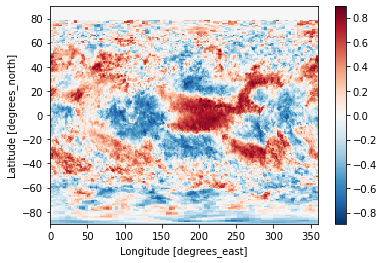

In [25]:
r_cf1.plot()

Above, cf1 (3D) is regressed with y1 (1D)

What should be done next, cf1 (3D) regressed against S (3D)